In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split

# Zadanie 4:
Utwórz skrypt w Pythonie, który wykorzystuje regresję wielomianową z scikit-learn do
modelowania zależności nieliniowych między zmiennymi miesięcy i tempreratury. Dopa-
Metody i narzędzia Big Data
©HZ
suj model do danych treningowych. Ocena modelu na zbiorze testowym za pomocą metryk
takich jak średni błąd kwadratowy (MSE) lub współczynnik determinacji (R2
). Zwizualizuj
wyniki regresji na wykresie, porównując przewidywane wartości z rzeczywistymi

In [2]:
# Wczytanie danych z pliku CSV
df = pd.read_csv('data/temperatures.csv')

# Sprawdzenie wymiarów DataFrame
print(f" wymiary {df.shape}")

# Typy danych
print(f" typy danych: {df.dtypes}")

# Zamiana na miesiace
df['month'] = pd.to_datetime(df['time']).dt.month

# Dane do modelu
X = df[['month']]
y = df['temperature']

 wymiary (26256, 2)
 typy danych: time            object
temperature    float64
dtype: object


In [3]:
# Tworzenie modelu
model = make_pipeline(PolynomialFeatures(3), LinearRegression())

# stwórz x_test z wymiarami takimi jak X które są w zbiorze treningowym
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Dopasowanie modelu do danych treningowych
model.fit(X_train, y_train)

# Ocena modelu na zbiorze testowym
print(f"R2: {model.score(X_test, y_test)}")

# Przewidywanie cen mieszkań
y_pred = model.predict(X_test)

R2: 0.6345475679526384


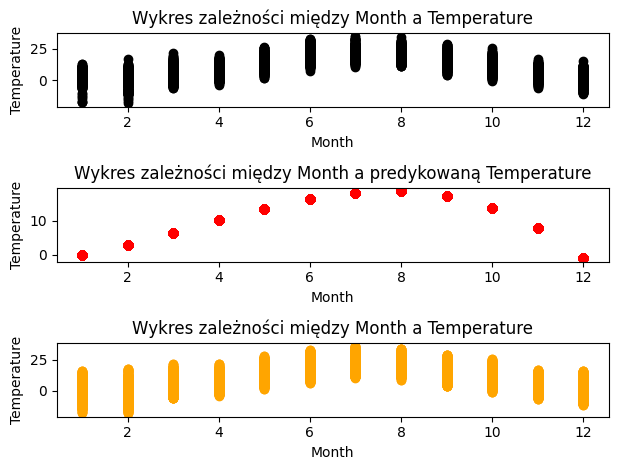

In [4]:

# wykresy
fig, ax = plt.subplots(3)
ax[0].scatter(X_test, y_test, color='black')
ax[0].set_xlabel("Month")
ax[0].set_ylabel("Temperature")
ax[0].set_title("Wykres zależności między Month a Temperature")

ax[1].scatter(X_test, y_pred, color='red')
ax[1].set_xlabel("Month")
ax[1].set_ylabel("Temperature")
ax[1].set_title("Wykres zależności między Month a predykowaną Temperature")

ax[2].scatter(df['month'], df['temperature'], color='orange')
ax[2].set_xlabel("Month")
ax[2].set_ylabel("Temperature")
ax[2].set_title("Wykres zależności między Month a Temperature")

plt.tight_layout()
plt.show()